# Predicción con Series de Tiempo

En este laboratorio se implementan 5 métodos diferentes para predecir con series de tiempo, utilizando 4 data sets distintos.

In [1]:
# se cargan las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime
from statistics import *
import matplotlib.pylab as p
from math import sqrt
%matplotlib inline

In [2]:
# se cargan los data sets
df_1 = pd.read_csv("monthly-mean-temp.csv")

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        240 non-null    object 
 1   Temperature  240 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [4]:
df_1.index = pd.to_datetime(df_1['Month'])
df_1.drop(columns='Month',inplace=True)
df_1.head()

,Temperature
Month,
1920-01-01,40.6
1920-02-01,40.8
1920-03-01,44.4
1920-04-01,46.7
1920-05-01,54.1


In [5]:
df_1.tail()

,Temperature
Month,
1939-08-01,61.8
1939-09-01,58.2
1939-10-01,46.7
1939-11-01,46.6
1939-12-01,37.8


#### Train and split

In [6]:
#train_test_split
buf = df_1.copy()
#train_test_split
tra = buf['Temperature'][:119].dropna()
tes = buf['Temperature'][119:].dropna()

C:\Users\DIANA\AppData\Local\Temp/ipykernel_10640/3971386028.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(buf.Temperature.dropna(),freq=119)


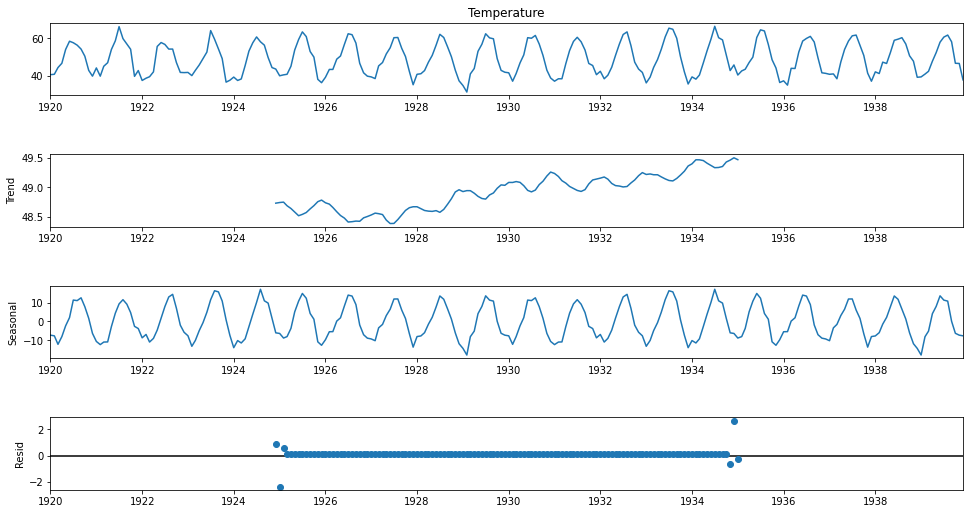

In [7]:
res = sm.tsa.seasonal_decompose(buf.Temperature.dropna(),freq=119)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

#### 1. Promedio

In [8]:
def prediccion_promedio(historia, config):
    n, tipo_prom = config
    if tipo_prom == "prom":
        return mean(historia[-n:])
    return median(historia[-n:])

In [9]:
print(prediccion_promedio(df_1['Temperature'], (120, 'prom')))

49.40416666666667


In [10]:
meses = df_1.resample('M').mean()
meses

,Temperature
Month,
1920-01-31,40.6
1920-02-29,40.8
1920-03-31,44.4
1920-04-30,46.7
1920-05-31,54.1
...,...
1939-08-31,61.8
1939-09-30,58.2
1939-10-31,46.7


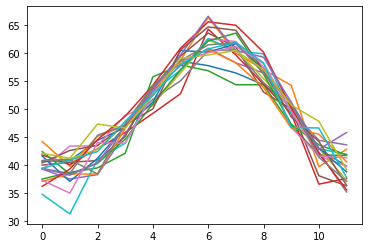

In [11]:
plt.plot(meses['1920'].values)
plt.plot(meses['1921'].values)
plt.plot(meses['1922'].values)
plt.plot(meses['1923'].values)
plt.plot(meses['1924'].values)
plt.plot(meses['1925'].values)
plt.plot(meses['1926'].values)
plt.plot(meses['1927'].values)
plt.plot(meses['1928'].values)
plt.plot(meses['1929'].values)
plt.plot(meses['1930'].values)
plt.plot(meses['1931'].values)
plt.plot(meses['1932'].values)
plt.plot(meses['1933'].values)
plt.plot(meses['1934'].values)
plt.plot(meses['1935'].values)
plt.plot(meses['1936'].values)
plt.plot(meses['1937'].values)
plt.plot(meses['1938'].values)
plt.plot(meses['1939'].values)

#### 2. SARIMAX

- Fuente de consulta: https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/ \
https://www.kaggle.com/poiupoiu/how-to-use-sarimax

In [12]:
sarimax = sm.tsa.statespace.SARIMAX(tra,order=(1,1,1),seasonal_order=(1,1,1,12),exog = tra,
                                enforce_invertibility=False).fit()
sarimax.summary()

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        Temperature   No. Observations:                  119
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                1013.244
Date:                            Sat, 25 Sep 2021   AIC                          -2014.488
Time:                                    17:03:56   BIC                          -1998.508
Sample:                                01-01-1920   HQIC                         -2008.011
                                     - 11-01-1929                                         
Covariance Type:                              opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature     1.0000    3.6e-07   2.78e+06      0.000       1.000       1.000
ar.L1           0.2262   3.72e-13   6.09e+11      0.000       0.226       0.226
ma.L1          -0.6916   6.73e-13  -1.03e+12      0.000      -0.692      -0.692
ar.S.L12       -0.6689    1.2e-12  -5.59e+11      0.000      -0.669      -0.669
ma.S.L12        0.1617   8.86e-13   1.82e+11      0.000       0.162       0.162
sigma2       2.735e-10   2.56e-10      1.068      0.286   -2.28e-10    7.75e-10
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.44   Prob(JB):                         0.85
Heteroskedasticity (H):               0.67   Skew:                             0.13
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


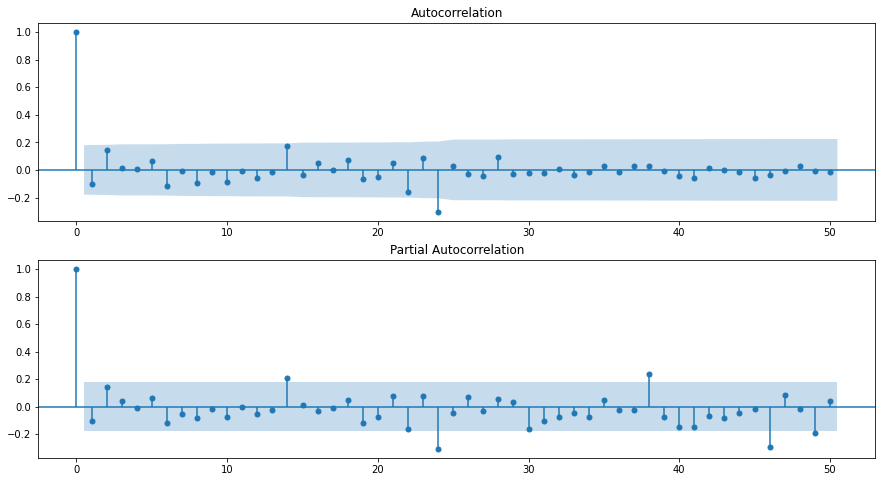

In [13]:
sarima = sm.tsa.statespace.SARIMAX(tra,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_stationarity=False, enforce_invertibility=False).fit()
sarima.summary()
res = sarima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
pred = sarimax.predict('1930-01-01','1939-12-01', exog = tes)[1:]
tes1 = tes[:119]
print('SARIMAX model MSE:{}'.format(mean_squared_error(tes1, pred)))
print('SARIMAX model RMSE:{}'.format(sqrt(mean_squared_error(tes1, pred))))

SARIMAX model MSE:82.18634296650794
SARIMAX model RMSE:9.065668368438587


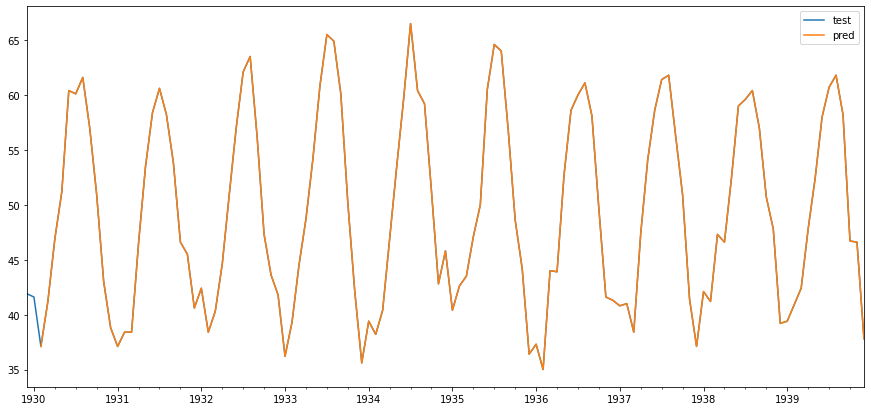

In [15]:
pd.DataFrame({'test':tes,'pred':pred}).plot(figsize=(15, 7))
plt.show()

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


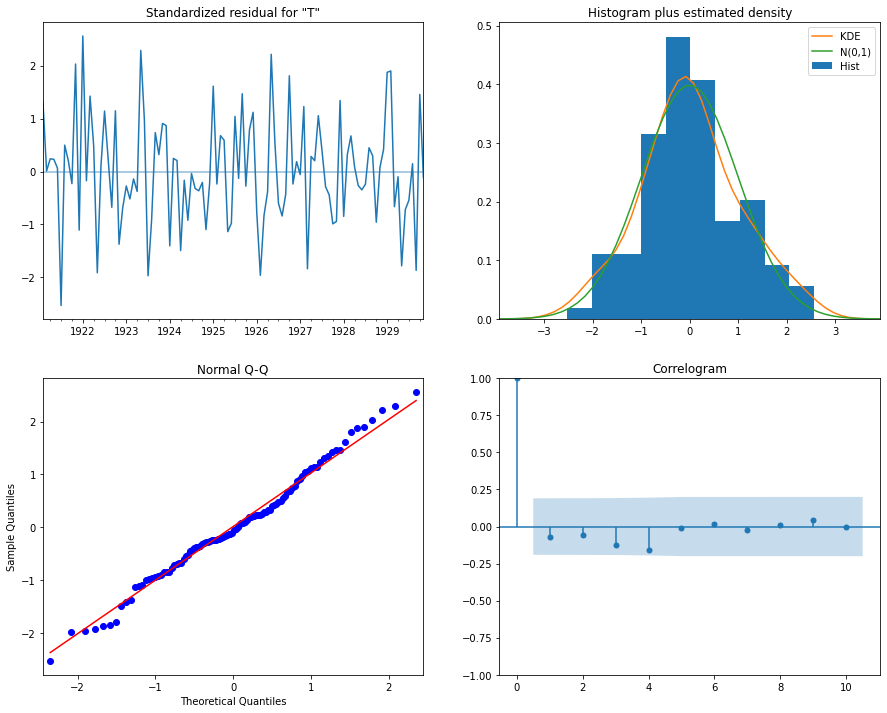

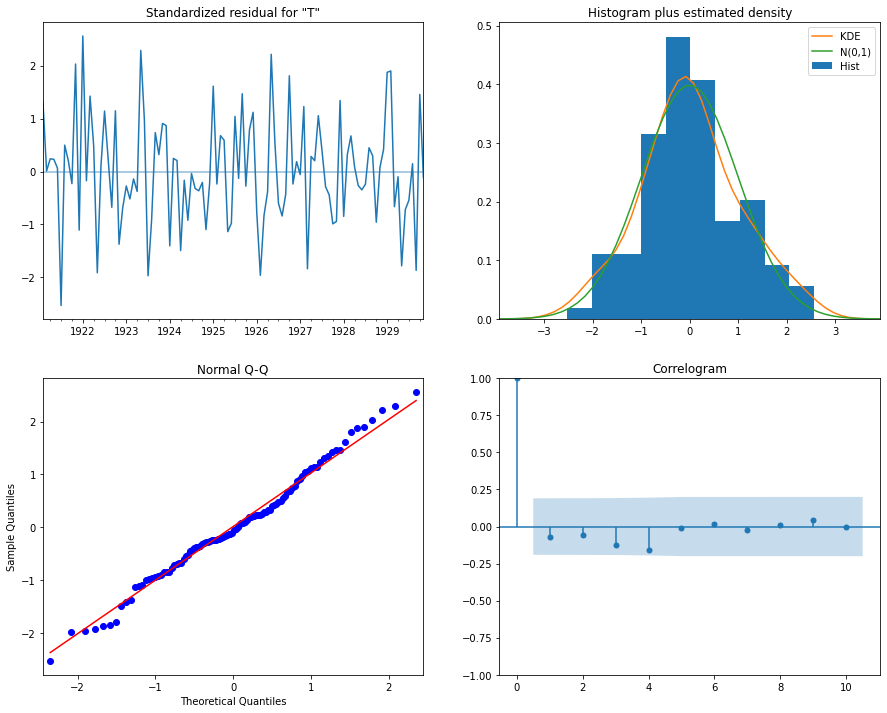

In [16]:
sarimax.plot_diagnostics(figsize=(15, 12))

In [17]:
#Mean Square Error
sarimax.mse

8.926734262827457e-10

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

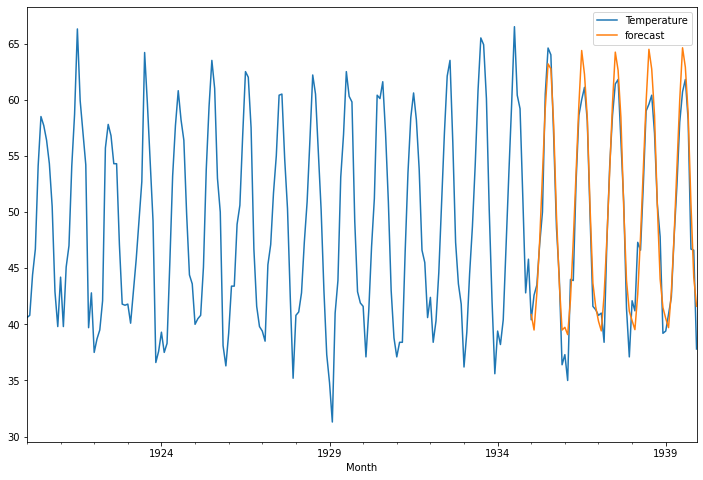

In [18]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_1['Temperature'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df_1['forecast']=results.predict(start=180,end=240,dynamic=True)
df_1[['Temperature','forecast']].plot(figsize=(12,8))

In [19]:
from pandas.tseries.offsets import DateOffset
pred_date=[df_1.index[-1] + DateOffset(months=x)for x in range(0,24)]
pred_date=pd.DataFrame(index=pred_date[1:],columns=df_1.columns)
pred_date

,Temperature,forecast
1940-01-01,NaN,NaN
1940-02-01,NaN,NaN
1940-03-01,NaN,NaN
1940-04-01,NaN,NaN
1940-05-01,NaN,NaN
1940-06-01,NaN,NaN
1940-07-01,NaN,NaN
1940-08-01,NaN,NaN
1940-09-01,NaN,NaN
1940-10-01,NaN,NaN


<AxesSubplot:>

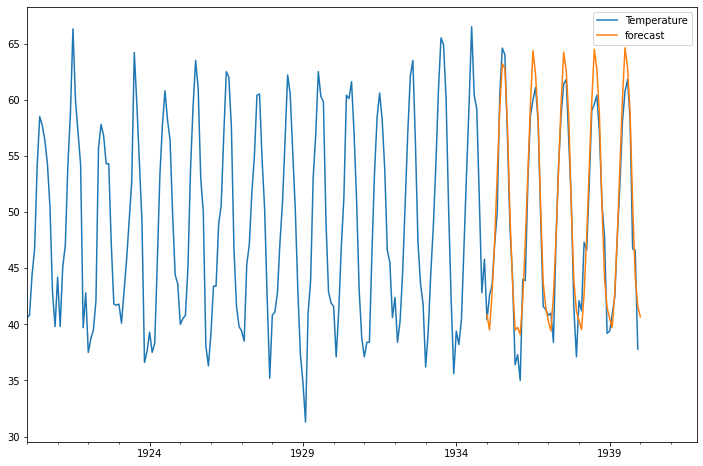

In [20]:
df_1=pd.concat([df_1,pred_date])
df_1['forecast'] = results.predict(start = 180, end = 240, dynamic= True)  
df_1[['Temperature', 'forecast']].plot(figsize=(12, 8))

#### 3. Winter-Holt

- Fuente de consulta: https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873

In [21]:
# se cargan los data sets
df_1 = pd.read_csv("monthly-mean-temp.csv")

In [22]:
df_1.index = pd.to_datetime(df_1['Month'])
df_1.drop(columns='Month',inplace=True)
df_1.head()

,Temperature
Month,
1920-01-01,40.6
1920-02-01,40.8
1920-03-01,44.4
1920-04-01,46.7
1920-05-01,54.1


In [23]:
#train_test_split
buf = df_1.copy()

In [24]:
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<AxesSubplot:title={'center':'Temperature Data'}, xlabel='Month'>

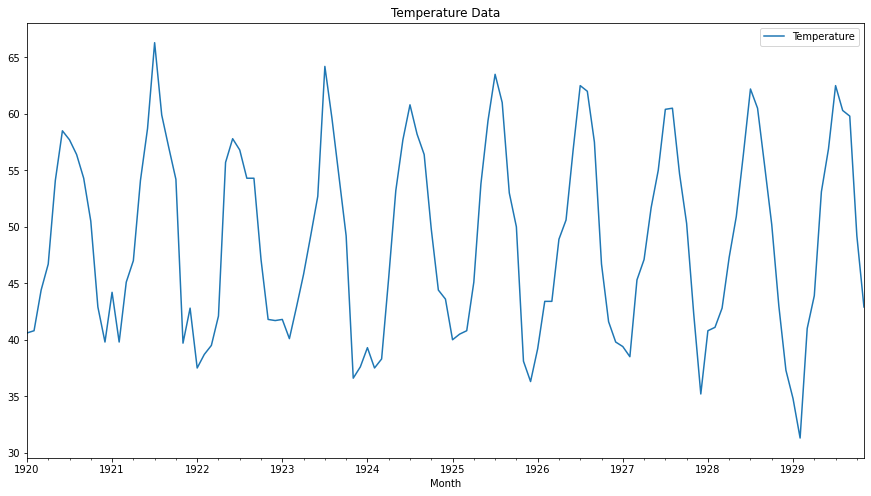

In [25]:
# plotting the original data
# Limite la data para ver bien las grafs
df_1 = df_1[:119]
df_1[['Temperature']].plot(title='Temperature Data', figsize=(15, 8))

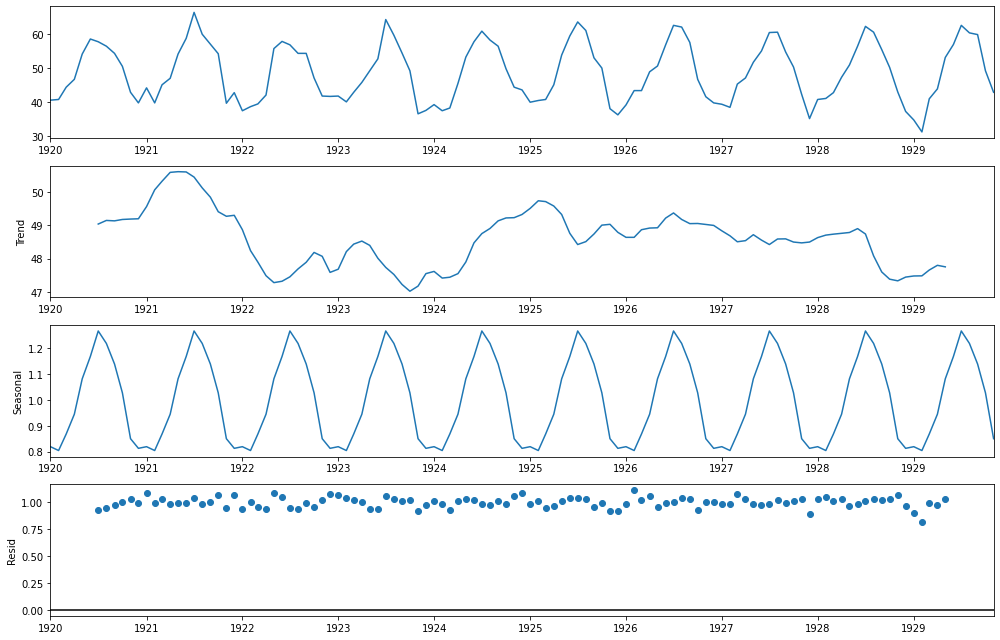

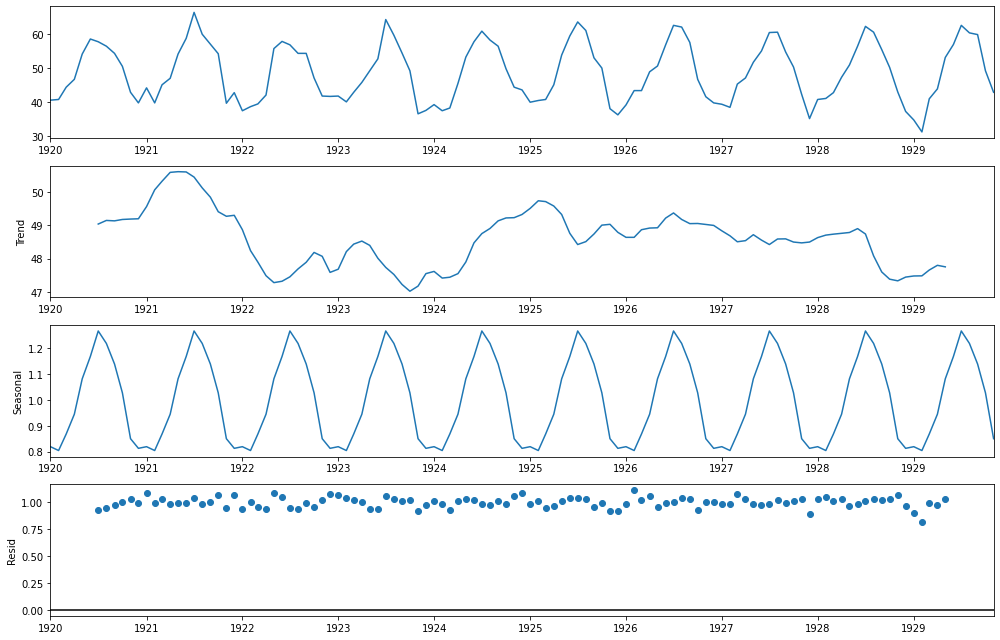

In [26]:
decompose_result = seasonal_decompose(df_1, model='multiplicative')
p.rcParams['figure.figsize'] = (14, 9)
decompose_result.plot()

In [27]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df_1.index.Temperature = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2 * m)

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='Month'>

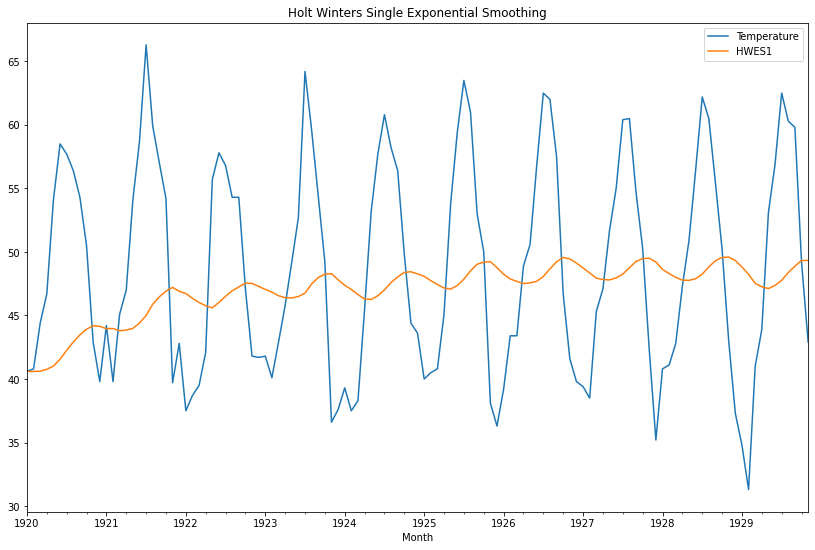

In [28]:
df_1['HWES1'] = SimpleExpSmoothing(df_1).fit(smoothing_level=alpha, optimized=False, use_brute=True).fittedvalues
df_1[['Temperature','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Month'>

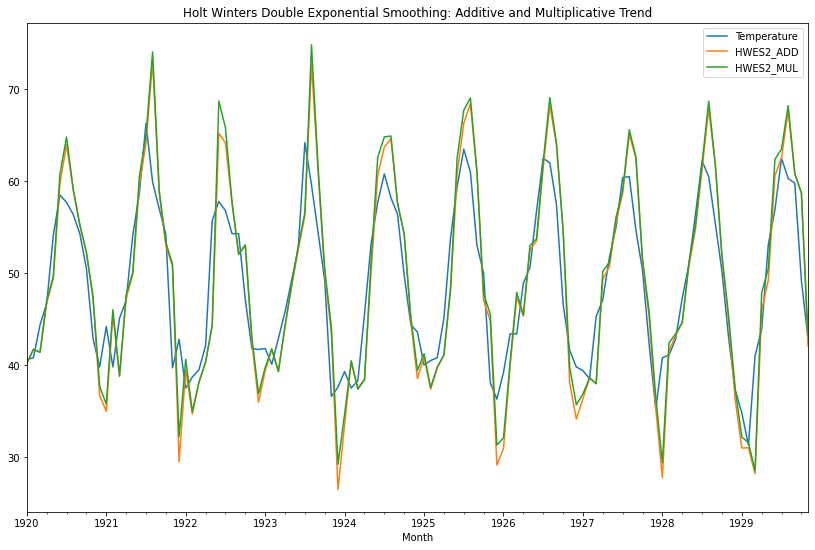

In [29]:
df_1['HWES2_ADD'] = ExponentialSmoothing(df_1['Temperature'],trend='add').fit().fittedvalues
df_1['HWES2_MUL'] = ExponentialSmoothing(df_1['Temperature'],trend='mul').fit().fittedvalues
df_1[['Temperature','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


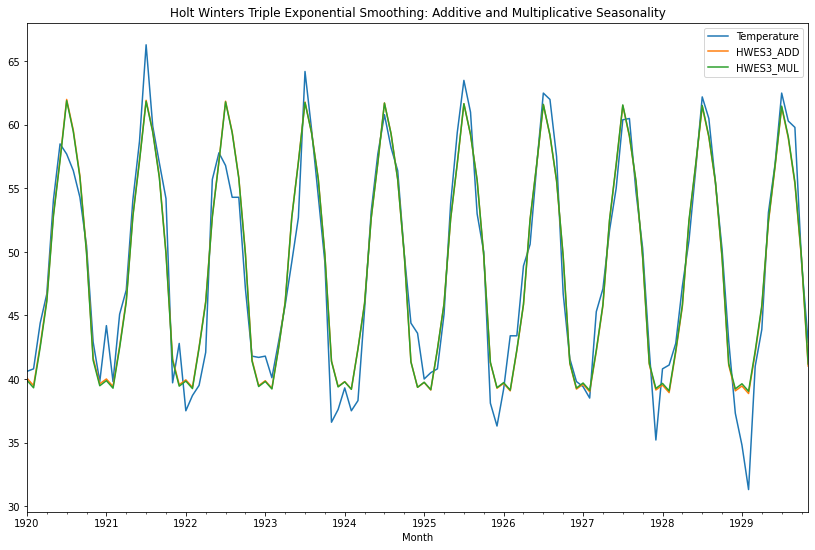

In [30]:
df_1['HWES3_ADD'] = ExponentialSmoothing(df_1['Temperature'],trend='add', seasonal='add',seasonal_periods=12).fit().fittedvalues
df_1['HWES3_MUL'] = ExponentialSmoothing(df_1['Temperature'],trend='mul', seasonal='mul',seasonal_periods=12).fit().fittedvalues
df_1[['Temperature','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

In [31]:
#train_test_split
tra = buf[:119].dropna()
tes = buf[119:].dropna()

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

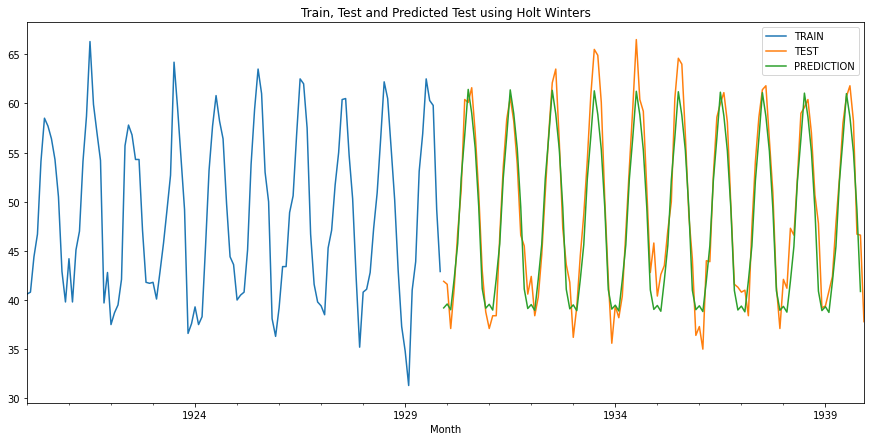

In [32]:
fitted_model = ExponentialSmoothing(tra['Temperature'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(120)
tra['Temperature'].plot(legend=True, label='TRAIN')
tes['Temperature'].plot(legend=True, label='TEST', figsize=(15,7))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

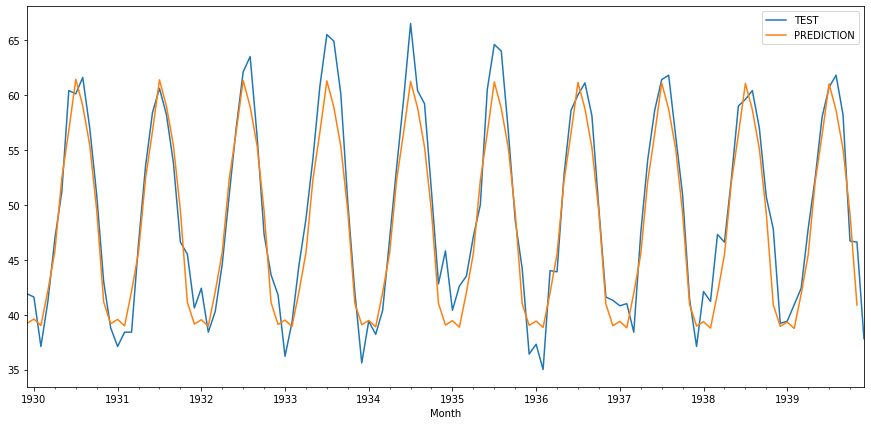

In [33]:
tes['Temperature'].plot(legend=True,label='TEST',figsize=(15,7))
test_predictions.plot(legend=True, label='PREDICTION', xlim=['1929-12-01','1939-12-01']);

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(tes[:120], test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(tes[:120], test_predictions)}')
print(f'Root Mean Squared Error = {sqrt(mean_squared_error(tes[:120], test_predictions))}')

Mean Absolute Error = 2.130764005846716
Mean Squared Error = 6.624760165259183
Root Mean Squared Error = 2.573860945206478


#### 4. Red Neuronal
- Fuente de consulta: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [35]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
# df_1 = pd.read_csv("daily-total-female-births.csv")
dataframe = read_csv('monthly-mean-temp.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Epoch 1/100
156/156 - 3s - loss: 0.2703
Epoch 2/100
156/156 - 0s - loss: 0.0905
Epoch 3/100
156/156 - 0s - loss: 0.0595
Epoch 4/100
156/156 - 0s - loss: 0.0562
Epoch 5/100
156/156 - 0s - loss: 0.0539
Epoch 6/100
156/156 - 0s - loss: 0.0517
Epoch 7/100
156/156 - 0s - loss: 0.0499
Epoch 8/100
156/156 - 0s - loss: 0.0479
Epoch 9/100
156/156 - 0s - loss: 0.0464
Epoch 10/100
156/156 - 0s - loss: 0.0447
Epoch 11/100
156/156 - 0s - loss: 0.0439
Epoch 12/100
156/156 - 0s - loss: 0.0426
Epoch 13/100
156/156 - 0s - loss: 0.0417
Epoch 14/100
156/156 - 0s - loss: 0.0403
Epoch 15/100
156/156 - 0s - loss: 0.0395
Epoch 16/100
156/156 - 0s - loss: 0.0386
Epoch 17/100
156/156 - 0s - loss: 0.0374
Epoch 18/100
156/156 - 0s - loss: 0.0359
Epoch 19/100
156/156 - 0s - loss: 0.0348
Epoch 20/100
156/156 - 0s - loss: 0.0329
Epoch 21/100
156/156 - 0s - loss: 0.0304
Epoch 22/100
156/156 - 0s - loss: 0.0289
Epoch 23/100
156/156 - 0s - loss: 0.0260
Epoch 24/100
156/156 - 0s - loss: 0.0233
Epoch 25/100
156/156 - 0s

In [36]:
# calculate Train Root Mean Squared Error (RMSE) 
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.19 RMSE
Test Score: 3.07 RMSE


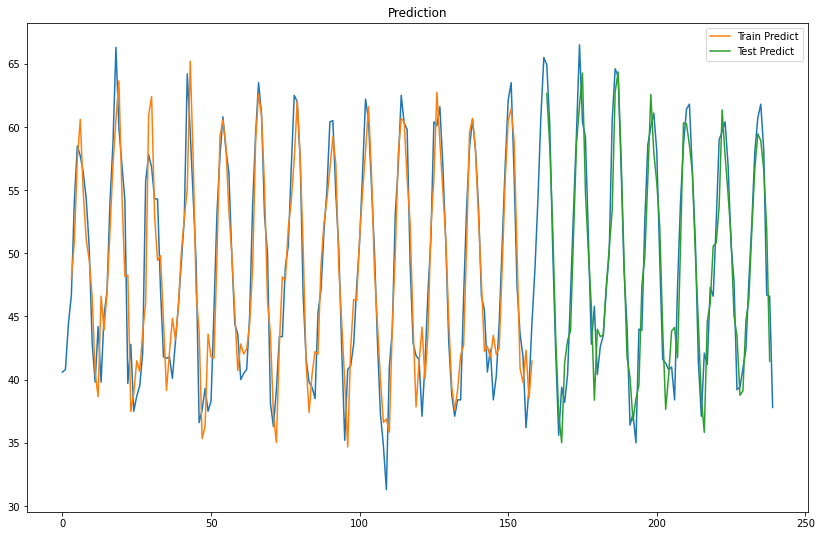

In [37]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, label='Train Predict')
plt.plot(testPredictPlot, label='Test Predict')
plt.title('Prediction')
plt.legend(loc='upper right')
plt.show()